In [23]:
import pandas as pd

# ESTAVA OCORRENCO UM ERRO EM RELAÇÃO A DEMARCAÇÃO, ENTÃO ESPECIFIQUEI O DELIMITADOR
df = pd.read_csv('remuneracaoServidores.csv', sep=';', low_memory=False)

display(df)

,MATRÍCULA,ÓRGÃO,CARGO,FUNÇÃO,SITUAÇÃO,MÊS,ANO,CÓDIGO DO ÓRGÃO,REMUNERAÇÃO BÁSICA,BENEFÍCIOS,...,DESCONTOS A MAIOR,LICENÇA PRÊMIO,IRRF,SEG. SOCIAL,TETO REDUTOR,OUTROS RECEBIMENTOS,OUTROS DESCONTOS OBRIGATÓRIOS,PAGAMENTOS A MAIOR,BRUTO,LÍQUIDO
0,79407972,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"4022,24",0,...,0,0,"167,08",0,0,0,0,0,"4022,24","3855,16"
1,67783779,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"9003,99",0,...,0,0,"823,15",0,0,0,0,0,"9003,99","8180,84"
2,12817273,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"8562,93",0,...,0,0,"714,59",0,0,0,0,0,"8562,93","7848,34"
3,14242673,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"4280,47",0,...,0,0,"200,59",0,0,0,0,0,"4280,47","4079,88"
4,50834073,CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL ...,NaN,NaN,PENSÃO,1,2023,1699072,"7605,15",0,...,0,0,"447,49",0,0,0,0,0,"7605,15","7157,66"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237120,4729,COMPANHIA ENERGETICA DE BRASILIA,COORDENADOR ADM E SUPORTE OPERACIONAL,COORDENADOR ADM E SUPORTE OPERACIONAL,ATIVO,1,2023,1219208,"4926,15",0,...,0,0,"298,79",0,0,0,0,0,"4926,15","4627,36"
237121,2619,TERRACAP,DIRETOR,DIRETOR DA DIRETORIA DE COMERCIALIZAÇÃO E NOVO...,OUTROS,1,2023,2250001,"54653,61","424,16",...,0,0,"12469,97","825,82",0,0,0,0,"55077,77","41781,98"
237122,2870,TERRACAP,PRESIDENTE,PRESIDENTE,OUTROS,1,2023,2250001,"54653,61","791,98",...,0,0,"13776,87","825,82",0,0,0,0,"55445,59","40842,9"
237123,263,COMPANHIA ENERGETICA DE BRASILIA,CONSULTOR JURIDICO,CONSULTOR JURIDICO,OUTROS,1,2023,1219208,"2344,56",0,...,0,0,0,0,0,0,"1860,4",0,"2344,56","484,16"


In [24]:
espaco_amostral = df.shape[0]
print(f"Espaço amostral: {espaco_amostral}")

Espaço amostral: 237125


In [25]:
bombeiros = df[df['ÓRGÃO'] == 'CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE']
quantidade_de_bombeiros = bombeiros.shape[0]
print(f"Servidores no corpo de bombeiros: {quantidade_de_bombeiros}")

Servidores no corpo de bombeiros: 12434


In [26]:
orgao_com_maior_numero = df['ÓRGÃO'].value_counts().idxmax()
print(f"Órgão com maior número de funcionários: {orgao_com_maior_numero}")

Órgão com maior número de funcionários: SECRETARIA DE ESTADO DE EDUCACAO                                                


In [27]:
secretaria_educacao = df[df['ÓRGÃO'] == 'SECRETARIA DE ESTADO DE EDUCACAO                                                ']
probabilidade = secretaria_educacao.shape[0] / espaco_amostral * 100
print(f"Probabilidade: {probabilidade:.2f}%")

Probabilidade: 27.89%


In [28]:
funcoes = df['FUNÇÃO'].dropna().unique()
print(f"Funções : {funcoes}")

Funções : ['                                                            '
 'ASSESSOR                                                    '
 'GERENTE DE PROJETOS ESPECIAIS                               ' ...
 'COORDENADOR DE TI' 'COORDENADOR ADM E SUPORTE OPERACIONAL'
 'DIRETOR DA DIRETORIA DE COMERCIALIZAÇÃO E NOVOS NEGÓCIOS']


In [31]:
# CONVERTENDO VALORES NÃO NUMÉRICOS EM NaN
df['BRUTO'] = df['BRUTO'].str.replace(',', '.').astype(float)

media_salarial_por_orgao = df.groupby('ÓRGÃO')['BRUTO'].mean()
orgao_maior_media = media_salarial_por_orgao.idxmax()
print(f"Órgão com maior média salarial: {orgao_maior_media}")

Órgão com maior média salarial: EMPRESA DE ASSISTENCIA TECNICA E EXTENSAO RURAL - EMATER                        


In [ ]:
servidor_maior_remuneracao = df.loc[df['REMUNERAÇÃO BÁSICA'].idxmax()]
orgao_maior_remuneracao = servidor_maior_remuneracao['ÓRGÃO']
print(f"Órgão do servidor com maior remuneração básica: {orgao_maior_remuneracao}")

Órgão do servidor com maior remuneração básica: SECRETARIA DE ESTADO DE EDUCACAO                                                


In [36]:
valor_total_pago = df['BRUTO'].sum()
print(f"Valor total pago para todos os funcionários públicos: R$ {valor_total_pago:.2f}")

Valor total pago para todos os funcionários públicos: R$ 2597694350.64


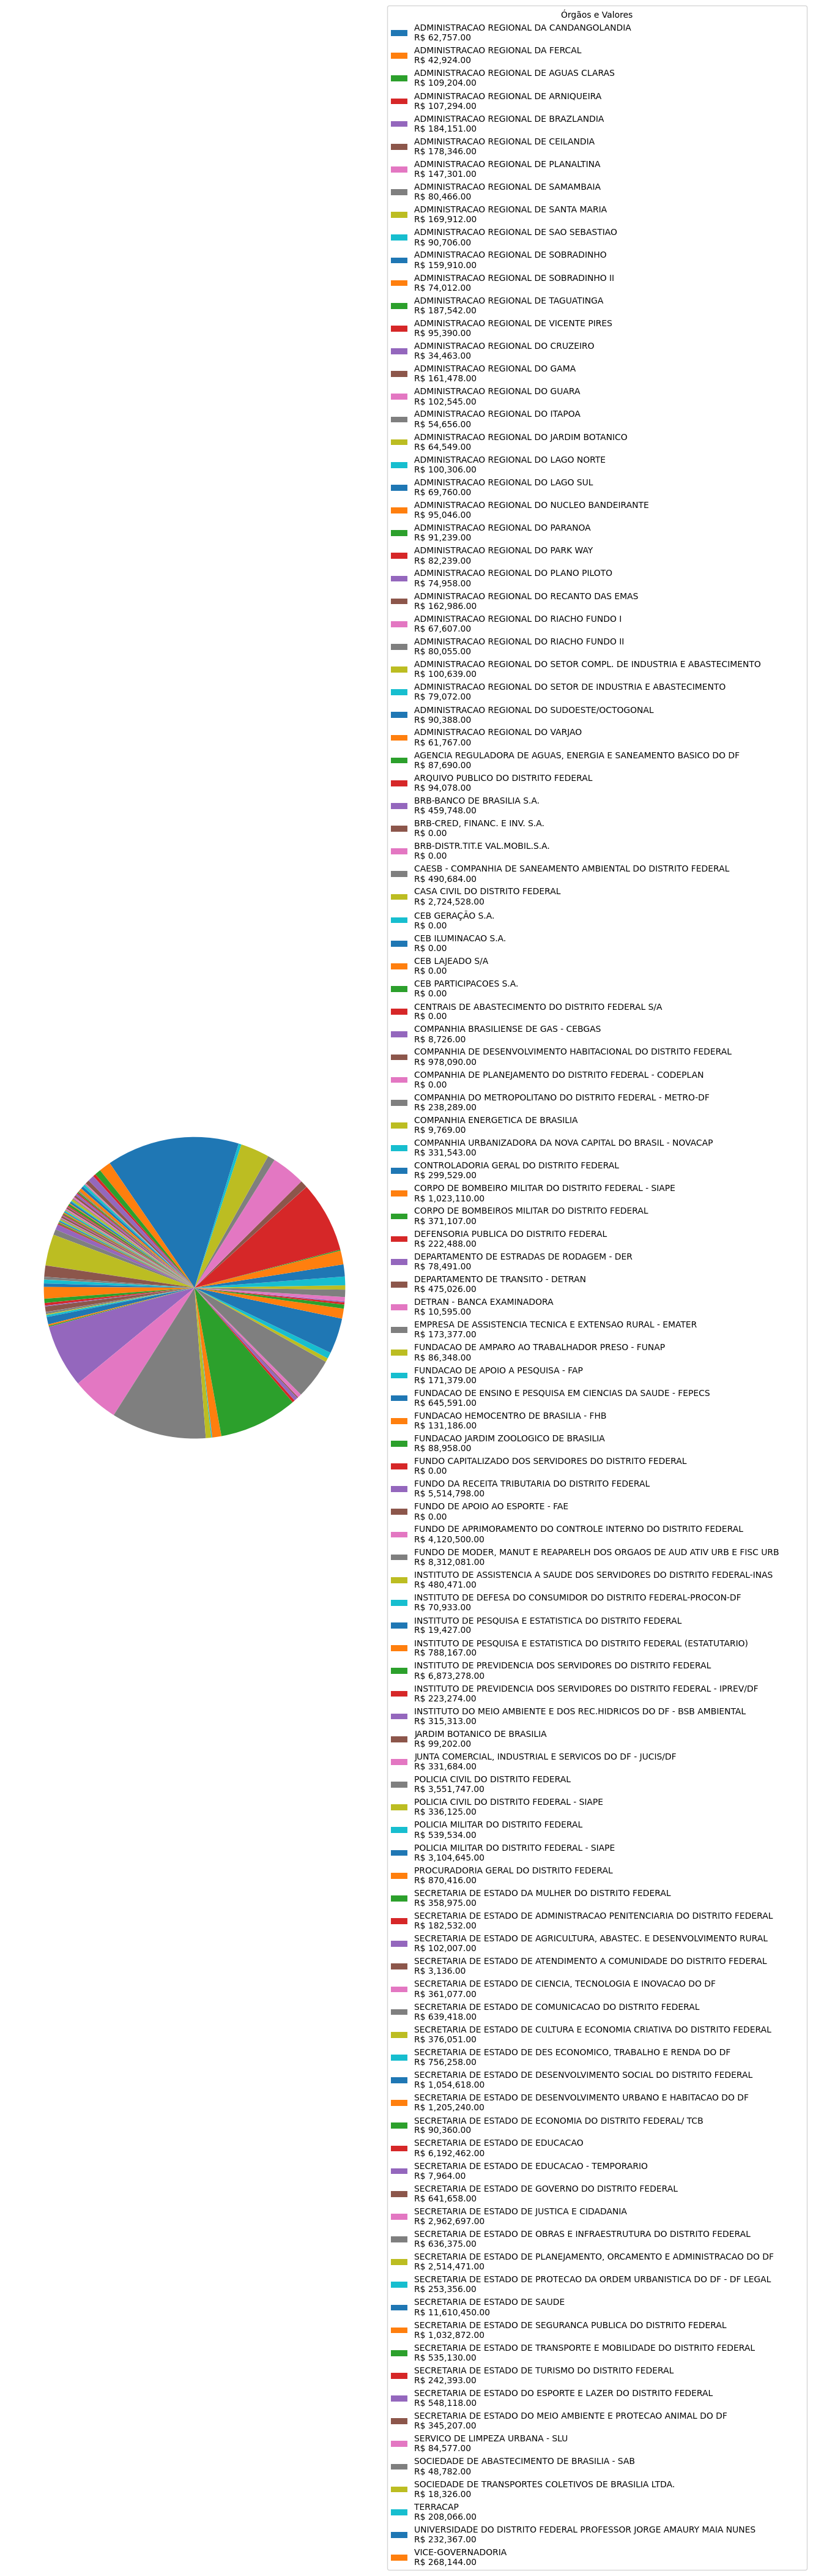

In [ ]:
import matplotlib.pyplot as plt

remuneracao_por_orgao = df.groupby('ÓRGÃO')['BRUTO'].sum()

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts = ax.pie(remuneracao_por_orgao, startangle=140)

legenda = [f"{orgao}\nR$ {valor:,.2f}" for orgao, valor in remuneracao_por_orgao.items()]

plt.legend(wedges, legenda, title="Órgãos e Valores", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

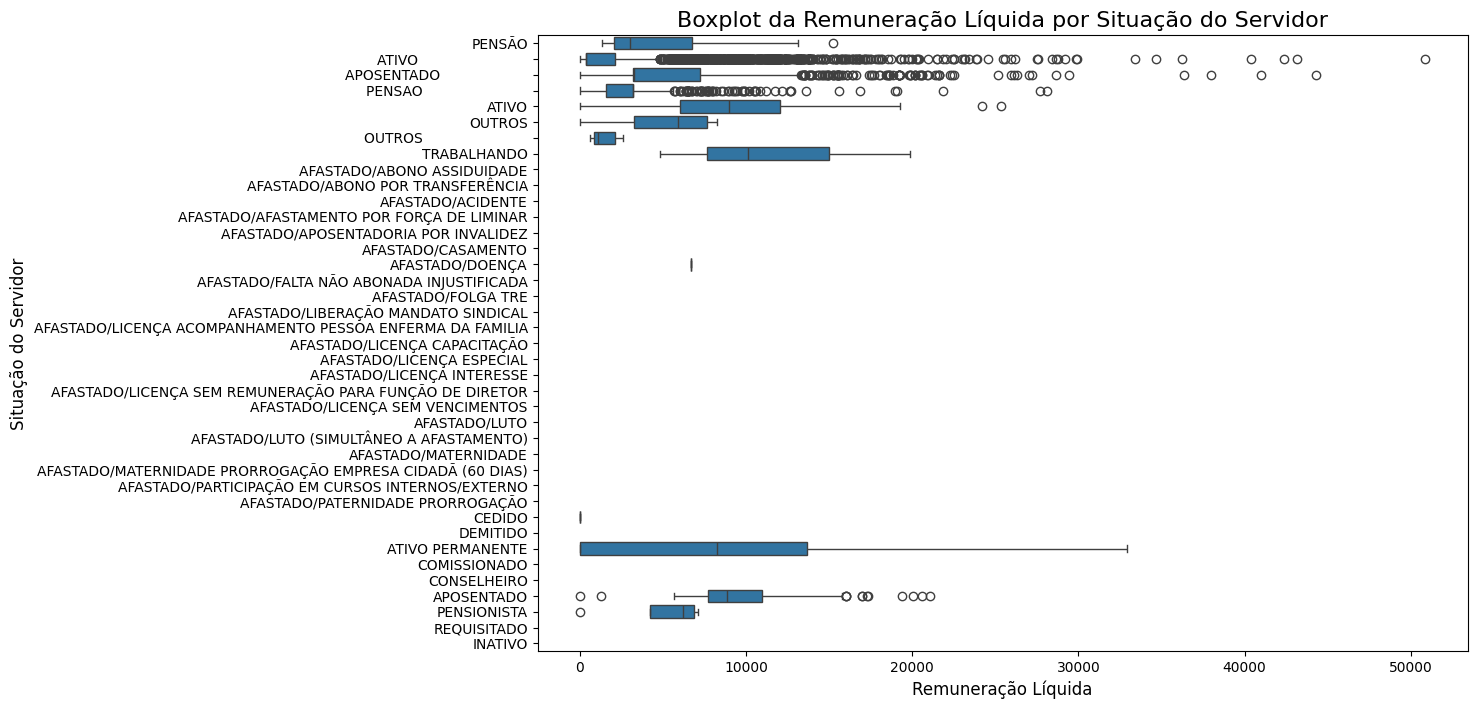

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])

plt.figure(figsize=(12, 8))
sns.boxplot(y='SITUAÇÃO', x='LÍQUIDO', data=df)

plt.title('Boxplot da Remuneração Líquida por Situação do Servidor', fontsize=16)
plt.xlabel('Remuneração Líquida', fontsize=12)
plt.ylabel('Situação do Servidor', fontsize=12)

plt.show()

In [ ]:
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])


desvio_padrao_por_orgao = df.groupby('ÓRGÃO')['LÍQUIDO'].std()

orgao_menos_variacao = desvio_padrao_por_orgao.idxmin()

print(f"Órgão com salário líquido de menor variação: {orgao_menos_variacao}")

Órgão com salário líquido de menor variação: ADMINISTRACAO REGIONAL DE AGUAS CLARAS                                          


In [ ]:
import pandas as pd

df['IRRF'] = pd.to_numeric(df['IRRF'])
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])
df['BRUTO'] = pd.to_numeric(df['BRUTO'])

correlacao_irrf_liquido = df['IRRF'].corr(df['LÍQUIDO'])

correlacao_irrf_bruto = df['IRRF'].corr(df['BRUTO'])

print(f"Correlação entre IRRF e salário líquido: {correlacao_irrf_liquido:.2f}")
print(f"Correlação entre IRRF e salário bruto: {correlacao_irrf_bruto:.2f}")

if abs(correlacao_irrf_liquido) > abs(correlacao_irrf_bruto):
    print("A correlação é maior entre IRRF e salário líquido.")
elif abs(correlacao_irrf_liquido) < abs(correlacao_irrf_bruto):
    print("A correlação é maior entre IRRF e salário bruto.")

Correlação entre IRRF e salário líquido: 0.01
Correlação entre IRRF e salário bruto: 0.06
A correlação é maior entre IRRF e salário bruto.


In [ ]:
df['IRRF'] = pd.to_numeric(df['IRRF'])
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])
df['BRUTO'] = pd.to_numeric(df['BRUTO'])

df['DIFERENCA_SALARIAL'] = df['BRUTO'] - df['LÍQUIDO']

correlacao_irrf_diferenca = df['IRRF'].corr(df['DIFERENCA_SALARIAL'])
print(f"Correlação entre IRRF e diferença salarial: {correlacao_irrf_diferenca:.2f}")

def calcular_correlacao_segura(grupo):
    if len(grupo) >= 2 and grupo['IRRF'].var() > 0 and grupo['DIFERENCA_SALARIAL'].var() > 0:
        return grupo['IRRF'].corr(grupo['DIFERENCA_SALARIAL'])
    else:
        return None  
    
correlacao_por_orgao = df.groupby('ÓRGÃO').apply(calcular_correlacao_segura).dropna()

if not correlacao_por_orgao.empty:
    orgao_maior_correlacao = correlacao_por_orgao.idxmax()
    maior_correlacao = correlacao_por_orgao.max()
    print(f"Órgão com maior correlação entre IRRF e diferença salarial: {orgao_maior_correlacao}")
    print(f"Correlação: {maior_correlacao:.2f}")

Correlação entre IRRF e diferença salarial: 0.52
Órgão com maior correlação entre IRRF e diferença salarial: ADMINISTRACAO REGIONAL DA FERCAL                                                
Correlação: 1.00
